<a href="https://colab.research.google.com/github/Minazor/ML_Challenge_for_Myself/blob/main/Build_a_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Recurrent Neural Network

## Sentiment Analysis
In this project, we will build a Long Short-term Memory (LSTM) neural network to solve a binary sentiment analysis problem.

For this, we'll use the “IMDB Movie Review Dataset" available on Keras. It includes 50000 highly polarized movie reviews categorized as positive or negative.

## Importing the required libraries
We'll start with importing required libraries.

📌 Use the keyword "import".

In [46]:
# Import TensorFlow
import tensorflow as tf

# Import NumPy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

## Dataset
Let's download the IMDB dataset which is included in Keras, and assign it to the corresponding variables *X_train*, *y_train*, *X_test*, and *y_test*. We want to include the most frequently used 10000 words, so we specify 10000 for the num_words parameter.

📌 Use the datasets.imdb.load_data() function of the Keras.

In [47]:
# Download the IMDB dataset included in Keras
# Set the parameter num_words to 10000
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words = 10000)

Before we move on, we can print a single sample to see what the data looks like.

📌 Use the print() function for this.

In [48]:
# Print a sample
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Then, we print the the number of samples in the X_train and X_test datasets to see how the dataset is distributed.

📌 Use f-strings for this.

In [49]:
# Print the number of samples
print(len(X_train))
print(len(X_test))

25000
25000


# Preprocessing
### Concatenate

To split the dataset with 80-10-10 ratio, we'll first concatenate train and test datasets to create one big dataset.

📌 Use contenate() function of the NumPy library for this.

In [50]:
# Concatenate X_train and X_test and assing it to a variable X
X = np.concatenate((X_train,X_test), axis = 0)

# Concatenate y_train and y_test and assing it to a variable y
y = np.concatenate((y_train,y_test), axis = 0)

###Padding

Since all reviews are at different lengths, we'll use padding to make all of them same length.

📌 Use preprocessing.sequence.pad_sequences() function for this.

In [51]:
# Pad all reviews in the X dataset to the length maxlen=1024
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen = 1024)

### Splitting

Now, split X and y into train, validation and test dataset and assign those to corresponding values.

📌 You can use list slicing methods for this.

📌 For this dataset, a 80-10-10 split corresponds to 40000 - 10000 - 10000 number of samples relatively.


In [52]:
# Create the training datasets
X_train = X[:40000]
y_train = y[:40000]
# Create the validation datasets
X_val = X[40000:45000]
y_val = y[40000:45000]
# Create the test datasets
X_test = X[45000:50000]
y_test = y[45000:50000]

To check if that worked out, print the number of samples in each dataset again.

📌 Use f-strings for this.

In [53]:
# Print the number of samples
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

40000
40000
5000
5000
5000
5000


## Constructing the neural network

That was it for the preprocessing of the data!

Now we can create our model. First, we start by creating a model object using the Sequential API of Keras.

📌 Use tf.keras.Sequential() to create a model object

In [54]:
model = tf.keras.Sequential()

### Embedding Layer

For the first layer, we add an embedding layer.

📌 Use tf.keras.layers.Embedding() for the embedding layer.

📌 Use .add() method of the object to add the layer.

In [55]:
# Add an embedding layer and a dropout
model.add(tf.keras.layers.Embedding(input_dim = 10000, output_dim=256))
model.add(tf.keras.layers.Dropout(0.7))

Then, we add a LSTM layer and a dense layer; each with a dropout.

📌 Use tf.keras.layers.LSTM() and tf.keras.layers.Dense() to create the layers.

📌 Use .add() method of the object to add the layer.

In [56]:
# Add a LSTM layer with dropout
model.add(tf.keras.layers.LSTM(256))
model.add(tf.keras.layers.Dropout(0.7))

# Add a Dense layer with dropout

model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.7))

### Output layer

As the last part of our neural network, we add the output layer. The number of nodes will be one since we are making binary classification. We'll use the sigmoid activation function in the output layer.

📌 Use tf.keras.layers.Dense() to create the layer.

📌 Use .add() method of the object to add the layer.

In [57]:
# Add the output layer
model.add(tf.keras.layers.Dense(1,activation = "sigmoid"))

### Optimizer

Now we have the structure of our model. To configure the model for training, we'll use the *.compile()* method. Inside the compile method, we have to define the following:
*   "Adam" for optimizer
*   "Binary Crossentropy" for the loss function


📌 Construct the model with the .compile() method.

In [58]:
model.compile(optimizer ="adam", loss="binary_crossentropy",metrics=["accuracy"])

## Training the model

It's time to train the model. We'll give the X_train and y_train datasets as the first two arguments. These will be used for training. And with the *validation_data* parameter, we'll give the X_val and y_val as a tuple.

📌 Use .fit() method of the model object for the training.

In [59]:
# Train the model for 5 epochs
results = model.fit(X_train, y_train,epochs= 5, validation_data=(X_val,y_val))

Epoch 1/5
1250/1250 [==============================] - 126s 99ms/step - loss: 0.4844 - accuracy: 0.7711 - val_loss: 0.4442 - val_accuracy: 0.8554
Epoch 2/5
1250/1250 [==============================] - 91s 72ms/step - loss: 0.3517 - accuracy: 0.8615 - val_loss: 0.3608 - val_accuracy: 0.8608
Epoch 3/5
1250/1250 [==============================] - 84s 68ms/step - loss: 0.6650 - accuracy: 0.5548 - val_loss: 0.5935 - val_accuracy: 0.7634
Epoch 4/5
1250/1250 [==============================] - 83s 67ms/step - loss: 0.5882 - accuracy: 0.6775 - val_loss: 0.6555 - val_accuracy: 0.6174
Epoch 5/5
1250/1250 [==============================] - 83s 67ms/step - loss: 0.4216 - accuracy: 0.8153 - val_loss: 0.3224 - val_accuracy: 0.8786


### Visualize the results

After the model is trained, we can create a graph to visualize the change of loss over time. Results are held in:
* results.history["loss"]
* results.history["val_loss"]

📌 Use plt.show() to display the graph.

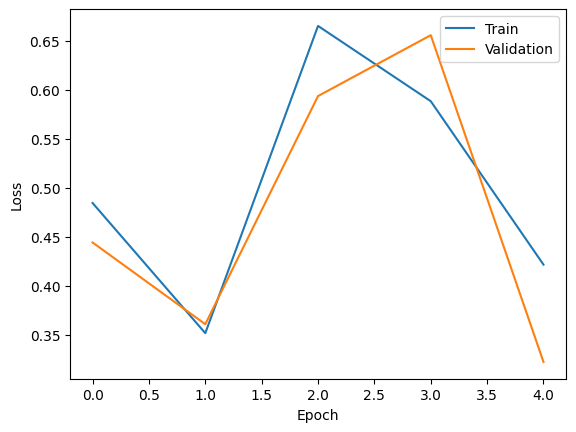

In [60]:
# Plot the the training loss
plt.plot(results.history["loss"], label = "Train")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label = "Validation")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")
# Put legend table
plt.legend()

# Show the plot
plt.show()

Now, do the same thing for accuracy.

📌 Accuracy scores can be found in:
* results.history["accuracy"]
* results.history["val_accuracy"]



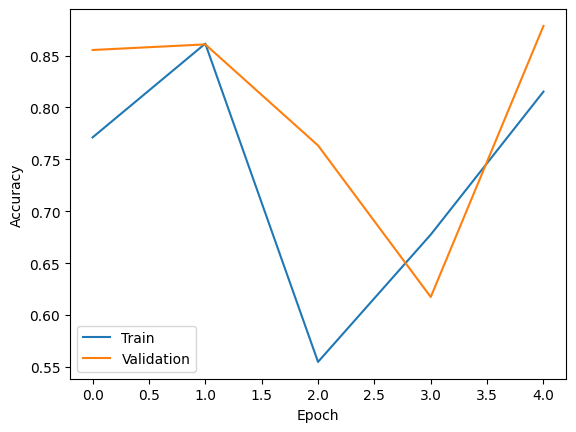

In [61]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label = "Train")
# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label = "Validation")


# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Put legend table
plt.legend()

# Show the plot
plt.show()


## Performance evaluation

Let's use the test dataset that we created to evaluate the performance of the model.

📌 Use test_on_batch() method with test dataset as parameter.

In [62]:
# Evaluate the performance
model.evaluate(X_test, y_test)

157/157 [==============================] - 4s 25ms/step - loss: 0.3389 - accuracy: 0.8728


[0.33893612027168274, 0.8727999925613403]

### Try a prediction

Next, we take a sample and make a prediction on it.

📌 Reshape the review to (1, 1024).

📌 Use the .prediction() method of the model object.

In [64]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[789].reshape(1,1024))

1/1 [==============================] - 1s 665ms/step


In [65]:
print(f"Label: {y_test[789]} | Prediction: {prediction_result}")

Label: 0 | Prediction: [[0.09391604]]
